In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
from collections import Counter
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
from io import BytesIO
import pyodbc

In [ ]:
server = 'server'
database = 'database'
username = 'User'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

query = """
to het data columns as [INVDET_INVNO],[INVDET_PROCODE],[INVDET_PRODESC]

to get invoice numbers items and names

"""
df = pd.read_sql(query, conn)

conn.close()
df 

C:\Users\darshanaw\AppData\Local\Temp\ipykernel_12240\83297762.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


INVDET_INVNO INVDET_PROCODE                            INVDET_PRODESC
0            5090204         003060   LEMON PUFF 200G - MUNCHEE  - SKU 003060
1            4020017         004963  PUMPKIN 350G - 400G - CELESTE DAILY - SK
2            4163403         004963  PUMPKIN 350G - 400G - CELESTE DAILY - SK
3            4062147         004963  PUMPKIN 350G - 400G - CELESTE DAILY - SK
4            4033302         004963  PUMPKIN 350G - 400G - CELESTE DAILY - SK
...              ...            ...                                       ...
5918500      4028511         005384   HAIR MIRACLE CREAM 250G - EZTHARA - SKU
5918501      2001029         002882  CHILLI PIECES 100G - NATURE SPICES - SKU
5918502      2033585         001363  COCONUT MEDIUM 1 NUT - CELESTE DAILY - S
5918503      1098091         000207  FRESH MILK FULL CREAM 200ML - AMBEWELA -
5918504      1132783         001440  CAVENDISH BANANA 500G - 600G - CELESTE D

[5918505 rows x 3 columns]

## get invoice numbers as listing by invoice numbers 

In [3]:
import pandas as pd

# assuming your dataframe is called df
grouped_df = df.groupby('INVDET_INVNO').agg({
    'INVDET_PROCODE': lambda x: ','.join(x.astype(str)),
    'INVDET_PRODESC': lambda x: ','.join(x.astype(str))
}).reset_index()



In [4]:
# Add item count column
grouped_df['item_count'] = grouped_df['INVDET_PROCODE'].apply(lambda x: len(x.split(',')))

print(grouped_df)


         INVDET_INVNO                                     INVDET_PROCODE  \
0             1000001                                             001965   
1             1000002                 002099,001959,001965,001960,001131   
2             1000003                        000208,002441,000352,001131   
3             1000004  001557,002281,004255,003011,000441,004506,0022...   
4             1000005          001926,000186,001397,000208,007193,005014   
...               ...                                                ...   
956709  WSRMWH0000015                                             005160   
956710  WSRMWH0000016  002805,000516,000492,000544,000279,000319,0028...   
956711  WSRMWH0000017                                      005161,005160   
956712  WSRVM10000001                                             007381   
956713  WSRVM10000002  003273,005160,006600,001359,004506,004255,0065...   

                                           INVDET_PRODESC  item_count  
0              

In [5]:
# 1) Remove invoices that start with letters (keep only purely numeric strings)
grouped_df = grouped_df[grouped_df['INVDET_INVNO'].astype(str).str.isdigit()]
grouped_df

INVDET_INVNO                                     INVDET_PROCODE  \
0           1000001                                             001965   
1           1000002                 002099,001959,001965,001960,001131   
2           1000003                        000208,002441,000352,001131   
3           1000004  001557,002281,004255,003011,000441,004506,0022...   
4           1000005          001926,000186,001397,000208,007193,005014   
...             ...                                                ...   
956573      6078592                                             002673   
956574      6078593                                      001478,006123   
956575      6078594                        004164,003624,000662,002259   
956576      6078595                                             000429   
956577      6078596   001002,002716,001130,003427,005162,006233,003525   

                                           INVDET_PRODESC  item_count  
0                TAMARIND TANGO 370ML - B FRESH  - SKU 00           1  
1       PASSION FRUIT 300G - 400G - CELESTE DAIL,MANGO...           5  
2       FRESH MILK FULL CREAM 1L - AMBEWELA - SK,ASTRA...           4  
3       KOTTU MEE HOT & SPICY 80G - PRIMA - SKU,CHICKE...          11  
4       PEACH FLAVOURED CEYLON BLACK TEA 30G - D,EGGS ...           6  
...                                                   ...         ...  
956573           GOLD LEAF JOHN PLAYER 12 S  - SKU 002673           1  
956574  CREAM SODA 1.5L - ELEPHANT HOUSE - SKU 0,BLUEB...           2  
956575  APPLE NECTAR 500ML - KIST - SKU 004164,JUMBO P...           4  
956576           PEDIAPRO 1-3 YEARS MILK POWDER 400G - AN           1  
956577  PAPER SERVIETTES 100 S (1 PLY) - FLORA -,BOTTL...           7  

[956578 rows x 4 columns]

In [6]:
# Convert comma-separated string into list of items
grouped_df['items'] = grouped_df['INVDET_PRODESC'].str.split(',')


In [7]:
grouped_df

INVDET_INVNO                                     INVDET_PROCODE  \
0           1000001                                             001965   
1           1000002                 002099,001959,001965,001960,001131   
2           1000003                        000208,002441,000352,001131   
3           1000004  001557,002281,004255,003011,000441,004506,0022...   
4           1000005          001926,000186,001397,000208,007193,005014   
...             ...                                                ...   
956573      6078592                                             002673   
956574      6078593                                      001478,006123   
956575      6078594                        004164,003624,000662,002259   
956576      6078595                                             000429   
956577      6078596   001002,002716,001130,003427,005162,006233,003525   

                                           INVDET_PRODESC  item_count  \
0                TAMARIND TANGO 370ML - B FRESH  - SKU 00           1   
1       PASSION FRUIT 300G - 400G - CELESTE DAIL,MANGO...           5   
2       FRESH MILK FULL CREAM 1L - AMBEWELA - SK,ASTRA...           4   
3       KOTTU MEE HOT & SPICY 80G - PRIMA - SKU,CHICKE...          11   
4       PEACH FLAVOURED CEYLON BLACK TEA 30G - D,EGGS ...           6   
...                                                   ...         ...   
956573           GOLD LEAF JOHN PLAYER 12 S  - SKU 002673           1   
956574  CREAM SODA 1.5L - ELEPHANT HOUSE - SKU 0,BLUEB...           2   
956575  APPLE NECTAR 500ML - KIST - SKU 004164,JUMBO P...           4   
956576           PEDIAPRO 1-3 YEARS MILK POWDER 400G - AN           1   
956577  PAPER SERVIETTES 100 S (1 PLY) - FLORA -,BOTTL...           7   

                                                    items  
0              [TAMARIND TANGO 370ML - B FRESH  - SKU 00]  
1       [PASSION FRUIT 300G - 400G - CELESTE DAIL, MAN...  
2       [FRESH MILK FULL CREAM 1L - AMBEWELA - SK, AST...  
3       [KOTTU MEE HOT & SPICY 80G - PRIMA - SKU, CHIC...  
4       [PEACH FLAVOURED CEYLON BLACK TEA 30G - D, EGG...  
...                                                   ...  
956573         [GOLD LEAF JOHN PLAYER 12 S  - SKU 002673]  
956574  [CREAM SODA 1.5L - ELEPHANT HOUSE - SKU 0, BLU...  
956575  [APPLE NECTAR 500ML - KIST - SKU 004164, JUMBO...  
956576         [PEDIAPRO 1-3 YEARS MILK POWDER 400G - AN]  
956577  [PAPER SERVIETTES 100 S (1 PLY) - FLORA -, BOT...  

[956578 rows x 5 columns]

In [8]:
grouped_df['items'] = grouped_df['INVDET_PROCODE'].str.split(',')
grouped_df

INVDET_INVNO                                     INVDET_PROCODE  \
0           1000001                                             001965   
1           1000002                 002099,001959,001965,001960,001131   
2           1000003                        000208,002441,000352,001131   
3           1000004  001557,002281,004255,003011,000441,004506,0022...   
4           1000005          001926,000186,001397,000208,007193,005014   
...             ...                                                ...   
956573      6078592                                             002673   
956574      6078593                                      001478,006123   
956575      6078594                        004164,003624,000662,002259   
956576      6078595                                             000429   
956577      6078596   001002,002716,001130,003427,005162,006233,003525   

                                           INVDET_PRODESC  item_count  \
0                TAMARIND TANGO 370ML - B FRESH  - SKU 00           1   
1       PASSION FRUIT 300G - 400G - CELESTE DAIL,MANGO...           5   
2       FRESH MILK FULL CREAM 1L - AMBEWELA - SK,ASTRA...           4   
3       KOTTU MEE HOT & SPICY 80G - PRIMA - SKU,CHICKE...          11   
4       PEACH FLAVOURED CEYLON BLACK TEA 30G - D,EGGS ...           6   
...                                                   ...         ...   
956573           GOLD LEAF JOHN PLAYER 12 S  - SKU 002673           1   
956574  CREAM SODA 1.5L - ELEPHANT HOUSE - SKU 0,BLUEB...           2   
956575  APPLE NECTAR 500ML - KIST - SKU 004164,JUMBO P...           4   
956576           PEDIAPRO 1-3 YEARS MILK POWDER 400G - AN           1   
956577  PAPER SERVIETTES 100 S (1 PLY) - FLORA -,BOTTL...           7   

                                                    items  
0                                                [001965]  
1                [002099, 001959, 001965, 001960, 001131]  
2                        [000208, 002441, 000352, 001131]  
3       [001557, 002281, 004255, 003011, 000441, 00450...  
4        [001926, 000186, 001397, 000208, 007193, 005014]  
...                                                   ...  
956573                                           [002673]  
956574                                   [001478, 006123]  
956575                   [004164, 003624, 000662, 002259]  
956576                                           [000429]  
956577  [001002, 002716, 001130, 003427, 005162, 00623...  

[956578 rows x 5 columns]

In [9]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd




In [10]:
grouped_df = grouped_df[grouped_df['item_count'] > 1]


In [11]:


transactions = grouped_df['items'].tolist()




In [12]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_array, columns=te.columns_)

In [13]:
basket_df

000001  000002  000003  000007  000010  000011  000012  000014  \
0        False   False   False   False   False   False   False   False   
1        False   False   False   False   False   False   False   False   
2        False   False   False   False   False   False   False   False   
3        False   False   False   False   False   False   False   False   
4        False   False   False   False   False   False   False   False   
...        ...     ...     ...     ...     ...     ...     ...     ...   
802434   False   False   False   False   False   False   False   False   
802435   False   False   False   False   False   False   False   False   
802436   False   False   False   False   False   False   False   False   
802437   False   False   False   False   False   False   False   False   
802438   False   False   False   False   False   False   False   False   

        000016  000023  ...  007720  007721  007734  007735  007736  007756  \
0        False   False  ...   False   False   False   False   False   False   
1        False   False  ...   False   False   False   False   False   False   
2        False   False  ...   False   False   False   False   False   False   
3        False   False  ...   False   False   False   False   False   False   
4        False   False  ...   False   False   False   False   False   False   
...        ...     ...  ...     ...     ...     ...     ...     ...     ...   
802434   False   False  ...   False   False   False   False   False   False   
802435   False   False  ...   False   False   False   False   False   False   
802436   False   False  ...   False   False   False   False   False   False   
802437   False   False  ...   False   False   False   False   False   False   
802438   False   False  ...   False   False   False   False   False   False   

        007757  007760  007762  007772  
0        False   False   False   False  
1        False   False   False   False  
2        False   False   False   False  
3        False   False   False   False  
4        False   False   False   False  
...        ...     ...     ...     ...  
802434   False   False   False   False  
802435   False   False   False   False  
802436   False   False   False   False  
802437   False   False   False   False  
802438   False   False   False   False  

[802439 rows x 5175 columns]

In [14]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)


      support                  itemsets
0    0.017831                  (000016)
1    0.037286                  (000029)
2    0.040488                  (000030)
3    0.040472                  (000031)
4    0.029364                  (000039)
..        ...                       ...
237  0.020718  (004938, 004951, 004918)
238  0.014391  (004940, 004951, 004918)
239  0.010862  (004951, 004963, 004918)
240  0.010691  (005732, 004951, 004918)
241  0.011536  (004938, 004951, 004940)

[242 rows x 2 columns]


In [15]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values('lift', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


          antecedents       consequents   support  confidence      lift
199  (004918, 000083)          (004917)  0.010822    0.387627  7.476906
202          (004917)  (004918, 000083)  0.010822    0.208745  7.476906
208          (004917)  (004951, 000083)  0.010881    0.209875  7.216201
205  (004951, 000083)          (004917)  0.010881    0.374111  7.216201
287          (004940)  (004938, 004951)  0.011536    0.246926  7.101895
..                ...               ...       ...         ...       ...
100          (000674)          (004951)  0.013680    0.169017  1.363775
98           (000674)          (004918)  0.011826    0.146121  1.354937
99           (004918)          (000674)  0.011826    0.109663  1.354937
59           (000186)          (004926)  0.010084    0.062330  1.326043
58           (004926)          (000186)  0.010084    0.214539  1.326043

[288 rows x 5 columns]


In [16]:
# Create code → description mapping
product_map = df[['INVDET_PROCODE', 'INVDET_PRODESC']].drop_duplicates() \
                .set_index('INVDET_PROCODE')['INVDET_PRODESC'].to_dict()


In [17]:
def map_codes_to_names(itemset):
    return [product_map.get(item, item) for item in itemset]


In [18]:
rules['antecedent_names'] = rules['antecedents'].apply(map_codes_to_names)
rules['consequent_names'] = rules['consequents'].apply(map_codes_to_names)


In [19]:
print(rules[['antecedents', 'consequents', 
             'antecedent_names', 'consequent_names', 
             'support', 'confidence', 'lift']])


          antecedents       consequents  \
199  (004918, 000083)          (004917)   
202          (004917)  (004918, 000083)   
208          (004917)  (004951, 000083)   
205  (004951, 000083)          (004917)   
287          (004940)  (004938, 004951)   
..                ...               ...   
100          (000674)          (004951)   
98           (000674)          (004918)   
99           (004918)          (000674)   
59           (000186)          (004926)   
58           (004926)          (000186)   

                                      antecedent_names  \
199  [COMMON TOMATOES 100G - 150G - CELESTE DA, CAR...   
202         [COMMON BEANS 200G - 250G - CELESTE DAILY]   
208         [COMMON BEANS 200G - 250G - CELESTE DAILY]   
205  [RED BIG ONION 250G - 300G - CELESTE DAIL, CAR...   
287         [GARLIC 100G - CELESTE DAILY - SKU 004940]   
..                                                 ...   
100         [SANDWICH BREAD 500G - FINAGLE - SKU 0006]   
98          [SANDWI

# filter out week and noisy items

In [20]:
#rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1.2)]


In [21]:
rules.sort_values(by='confidence', ascending=False, inplace=True)


In [22]:
rules

antecedents       consequents  antecedent support  \
283  (004938, 004940)          (004951)            0.015649   
265  (004940, 004918)          (004951)            0.019783   
277  (005732, 004918)          (004951)            0.016368   
248  (004918, 000450)          (004951)            0.018862   
211  (004938, 000083)          (004918)            0.019194   
..                ...               ...                 ...   
45           (000186)          (000638)            0.161789   
239          (000186)  (004938, 004951)            0.161789   
50           (000186)          (004905)            0.161789   
56           (000186)          (004919)            0.161789   
59           (000186)          (004926)            0.161789   

     consequent support   support  confidence      lift  representativity  \
283            0.123933  0.011536    0.737198  5.948343               1.0   
265            0.123933  0.014391    0.727433  5.869548               1.0   
277            0.123933  0.010691    0.653190  5.270493               1.0   
248            0.123933  0.012269    0.650436  5.248270               1.0   
211            0.107844  0.011679    0.608492  5.642354               1.0   
..                  ...       ...         ...       ...               ...   
45             0.048546  0.012000    0.074169  1.527806               1.0   
239            0.034769  0.010284    0.063562  1.828123               1.0   
50             0.038187  0.010140    0.062676  1.641283               1.0   
56             0.040991  0.010092    0.062376  1.521685               1.0   
59             0.047004  0.010084    0.062330  1.326043               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
283  0.009597    3.333566       0.845111  0.090093   0.700021    0.415141   
265  0.011939    3.214134       0.846373  0.111278   0.688874    0.421776   
277  0.008663    2.526072       0.823747  0.082487   0.604128    0.369728   
248  0.009931    2.506170       0.825023  0.093995   0.600985    0.374716   
211  0.009609    2.278771       0.838870  0.101244   0.561167    0.358396   
..        ...         ...            ...       ...        ...         ...   
45   0.004145    1.027675       0.412148  0.060502   0.026930    0.160676   
239  0.004658    1.030747       0.540426  0.055207   0.029830    0.179666   
50   0.003962    1.026126       0.466136  0.053416   0.025461    0.164109   
56   0.003460    1.022807       0.409006  0.052373   0.022299    0.154284   
59   0.002479    1.016344       0.293335  0.050749   0.016081    0.138435   

                                      antecedent_names  \
283  [GREEN CHILIES 50G - 60G - CELESTE DAILY, GARL...   
265  [GARLIC 100G - CELESTE DAILY - SKU 004940, COM...   
277  [POTATO 250G (IMPORTED) - CELESTE DAILY -, COM...   
248  [COMMON TOMATOES 100G - 150G - CELESTE DA, POT...   
211  [GREEN CHILIES 50G - 60G - CELESTE DAILY, CARR...   
..                                                 ...   
45           [(1Pack Per Order) Eggs L (Pack Of 10) -]   
239          [(1Pack Per Order) Eggs L (Pack Of 10) -]   
50           [(1Pack Per Order) Eggs L (Pack Of 10) -]   
56           [(1Pack Per Order) Eggs L (Pack Of 10) -]   
59           [(1Pack Per Order) Eggs L (Pack Of 10) -]   

                                      consequent_names  
283         [RED BIG ONION 250G - 300G - CELESTE DAIL]  
265         [RED BIG ONION 250G - 300G - CELESTE DAIL]  
277         [RED BIG ONION 250G - 300G - CELESTE DAIL]  
248         [RED BIG ONION 250G - 300G - CELESTE DAIL]  
211         [COMMON TOMATOES 100G - 150G - CELESTE DA]  
..                                                 ...  
45            [SET YOGURT 80G - AMBEWELA - SKU 000638]  
239  [GREEN CHILIES 50G - 60G - CELESTE DAILY, RED ...  
50          [CABBAGE 200G - 250G - CELESTE DAILY - SK]  
56          [ENGLISH CUCUMBER 300G - 300G - CELESTE D]  
59          [FRESH CORIANDER LEAVES 25G - 30G - CELES]  

[288 rows x 16 column

In [23]:
rules.to_csv('rules.csv',index=False)

In [24]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski', 'antecedent_names',
       'consequent_names'],
      dtype='object')

In [25]:
rules['antecedents'] = rules['antecedent_names'].apply(lambda x: list(x))
rules['consequents'] = rules['consequent_names'].apply(lambda x: list(x))


In [26]:
import networkx as nx
import matplotlib.pyplot as plt



In [27]:
import pandas as pd

rules_expanded = []

for _, row in rules.iterrows():
    for a in list(row['antecedents']):
        for c in list(row['consequents']):
            rules_expanded.append([a, c, row['support'], row['confidence'], row['lift']])

rules_graph = pd.DataFrame(rules_expanded, 
                           columns=['item_from', 'item_to', 'support', 'confidence', 'lift'])


In [28]:
G = nx.DiGraph()

# Add nodes and edges
for _, row in rules_graph.iterrows():
    G.add_edge(row['item_from'], row['item_to'], weight=row['lift'], confidence=row['confidence'])

plt.figure(figsize=(14, 10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

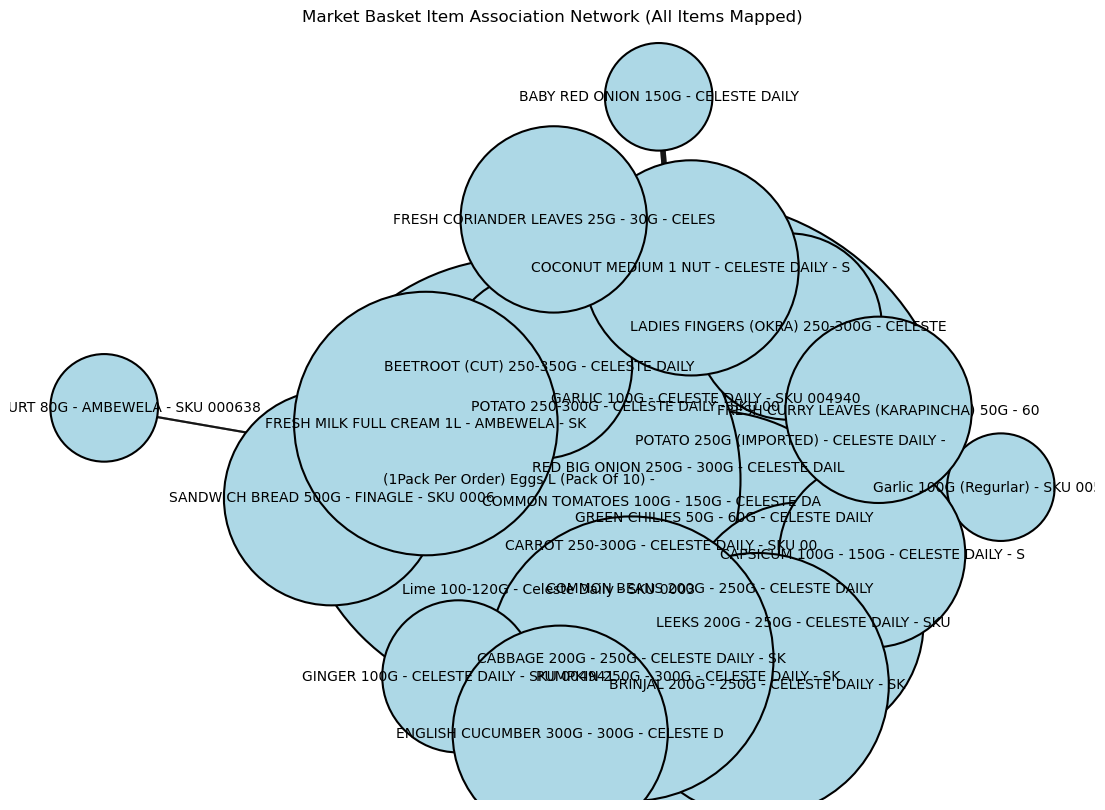

In [29]:
# Layout for visual spacing
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Node size = degree (importance)
node_sizes = [3000 * G.degree(node) for node in G.nodes()]

# Edge width = lift strength
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(14, 10))

# Draw graph
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=node_sizes, 
    node_color="lightblue", 
    edgecolors="black",      # ← ADD THIS LINE
    linewidths=1.5           # ← Optional: make border thicker
)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Market Basket Item Association Network (All Items Mapped)")
plt.axis('off')
plt.show()


In [30]:
rules_expanded = []

for _, row in rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            rules_expanded.append([
                a,                   # source item name
                c,                   # target item name
                row['lift'],         # edge strength
                row['confidence'],   # additional metric (optional)
            ])

rules_graph = pd.DataFrame(rules_expanded, columns=['source', 'target', 'lift', 'confidence'])


In [31]:
import networkx as nx
G_clean = nx.from_pandas_edgelist(
    rules_graph,
    source='source',
    target='target',
    edge_attr='lift',
    create_using=nx.DiGraph()
)

# Detect clusters
communities = nx.community.greedy_modularity_communities(G_clean)
community_map = {node: i for i, comm in enumerate(communities) for node in comm}


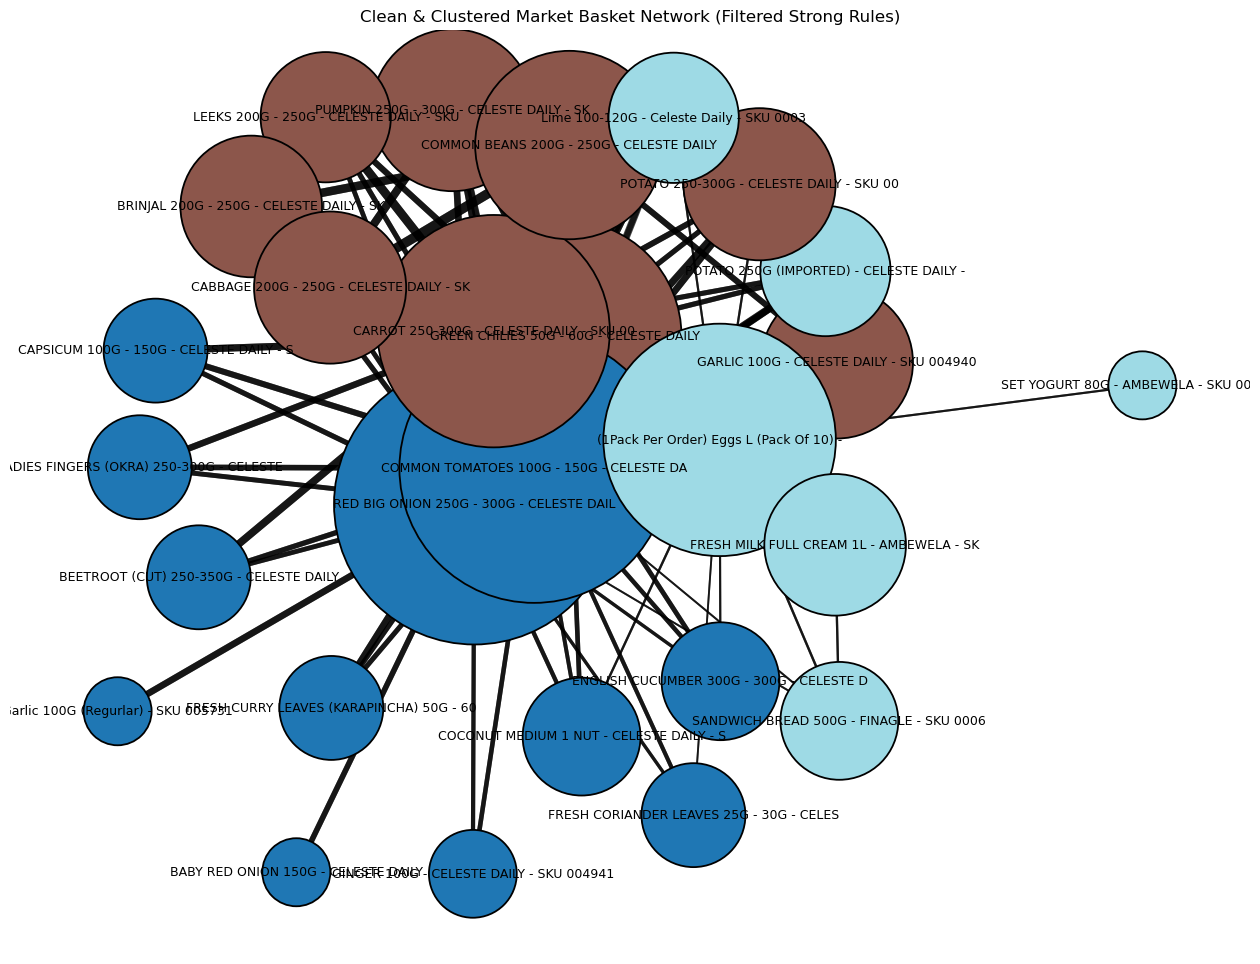

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))

pos = nx.kamada_kawai_layout(G_clean)   # MUCH clearer than spring layout

node_sizes = [800 + (800 * G_clean.degree(n)) for n in G_clean.nodes()]  # softer scaling
node_colors = [community_map[n] for n in G_clean.nodes()]  # color by cluster
edge_widths = [G_clean[u][v]['lift'] for u,v in G_clean.edges()]  # thickness by lift

nx.draw_networkx_nodes(
    G_clean,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap='tab20',
    edgecolors='black',
    linewidths=1.3
)

nx.draw_networkx_edges(
    G_clean,
    pos,
    width=edge_widths,
    alpha=0.7,
    arrowsize=15
)

nx.draw_networkx_labels(G_clean, pos, font_size=9)

plt.title("Clean & Clustered Market Basket Network (Filtered Strong Rules)")
plt.axis('off')
plt.show()


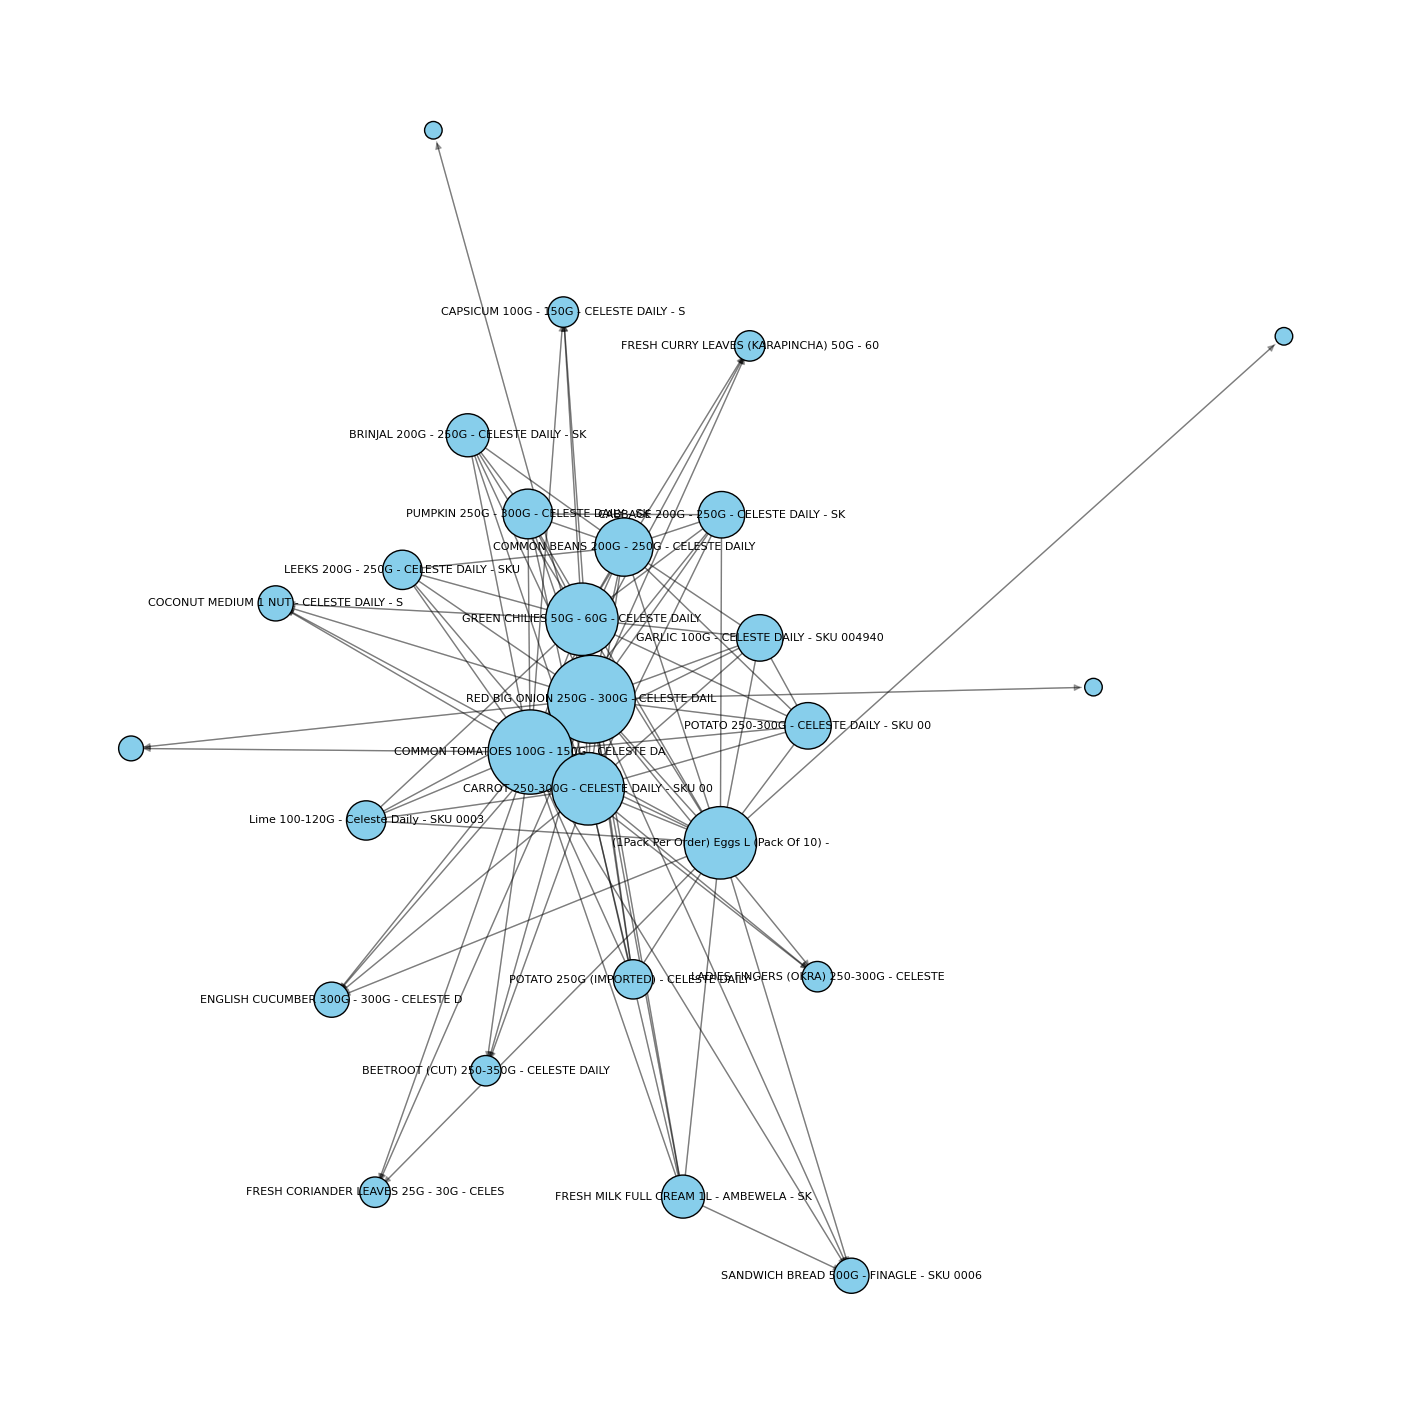

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))

# Position layout (better spacing)
pos = nx.spring_layout(G, k=0.7, iterations=50)

# Draw edges with transparency
nx.draw_networkx_edges(G, pos, alpha=0.3, width=1)

# Draw nodes smaller
sizes = [G.degree(node) * 80 for node in G.nodes()]  # adjust scale
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', edgecolors='black')

# Show labels only for high-degree nodes
labels = {node: node for node in G.nodes() if G.degree(node) > 5}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.axis('off')
plt.show()


C:\Users\darshanaw\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\darshanaw\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



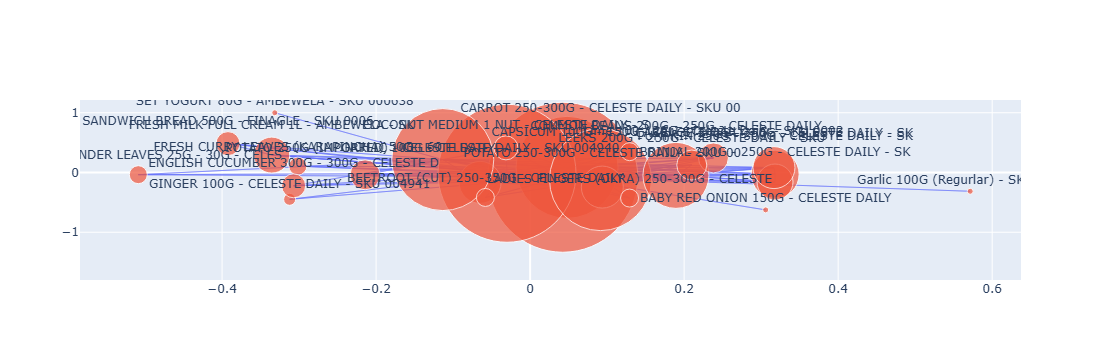

In [34]:
import networkx as nx
import plotly.graph_objects as go

pos = nx.spring_layout(G)

x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
text_nodes = list(G.nodes())

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

fig = go.Figure()

fig.add_trace(go.Scatter(x=edge_x, y=edge_y,
                         mode='lines', line=dict(width=0.5), hoverinfo='none'))

fig.add_trace(go.Scatter(x=x_nodes, y=y_nodes,
                         mode='markers+text',
                         text=text_nodes, textposition="top center",
                         marker=dict(size=[G.degree(n)*3 for n in G.nodes()])))

fig.update_layout(showlegend=False)
fig.show()


C:\Users\darshanaw\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\darshanaw\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



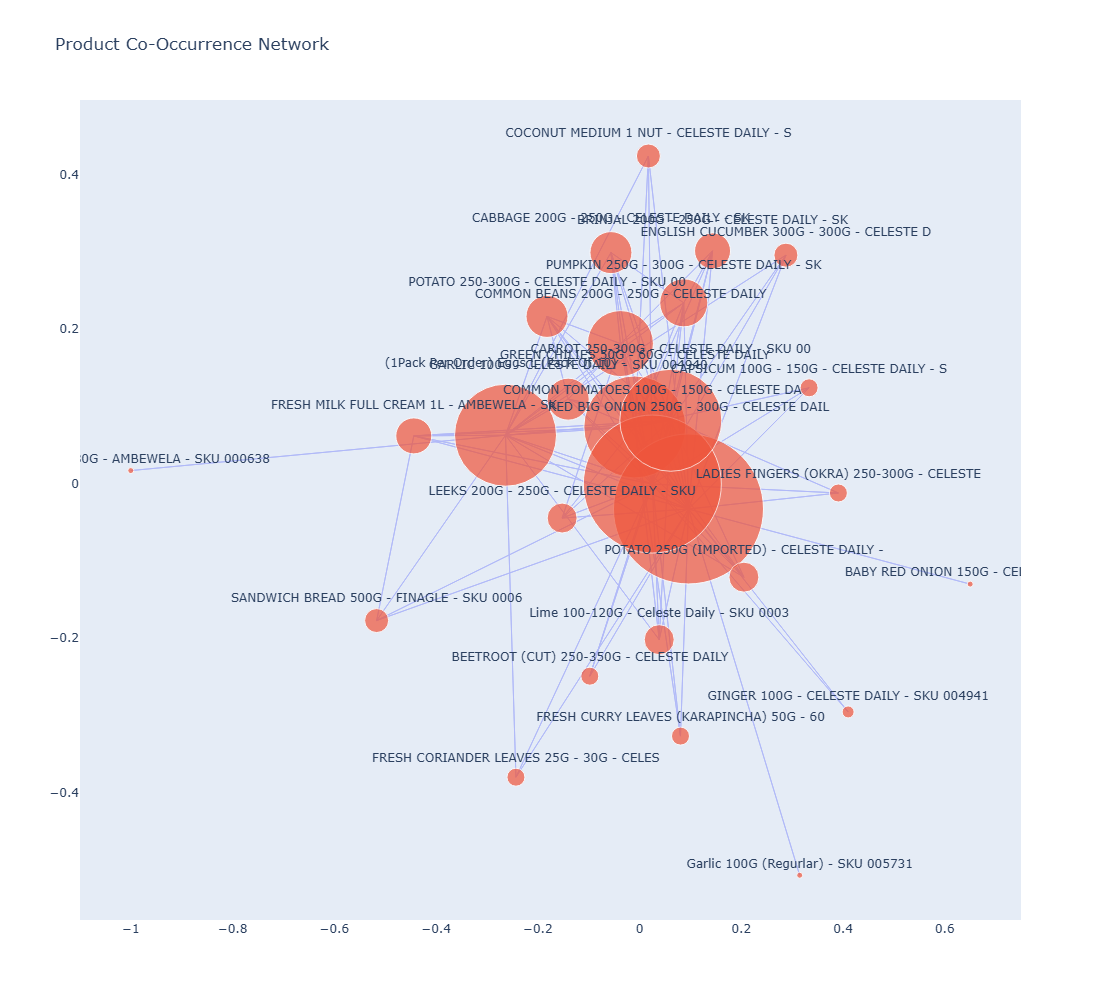

In [35]:
import networkx as nx
import plotly.graph_objects as go

# Layout (adjust k for spacing)
pos = nx.spring_layout(G, k=0.8, iterations=60)

x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
text_nodes = list(G.nodes())

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

fig = go.Figure()

# Draw edges
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines', 
    line=dict(width=1),
    hoverinfo='none',
    opacity=0.4
))

# Draw nodes
fig.add_trace(go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    text=text_nodes,
    textposition="top center",
    marker=dict(
        size=[G.degree(n)*3 for n in G.nodes()],
        line=dict(width=1)
    ),
    hoverinfo="text"
))

# Make figure BIGGER + Show Axis
fig.update_layout(
    width=1400,         # width bigger
    height=1000,        # height bigger
    title="Product Co-Occurrence Network",
    font=dict(size=12),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
    showlegend=False
)

fig.show()
